In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Heart_Disease_Prediction.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rishidamarla/heart-disease-prediction",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1031262268.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 11.6k/11.6k [00:00<00:00, 16.2MB/s]

First 5 records:    Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2           

# Check Missing and Duplicate

In [ ]:
display(df.isna().sum())
display(df.duplicated().sum())

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


np.int64(0)

In [ ]:

display(df['Heart Disease'].value_counts())
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})
display(df.head())

,count
Heart Disease,
Absence,150
Presence,120


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Check Outliers via Visulation and IQR

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

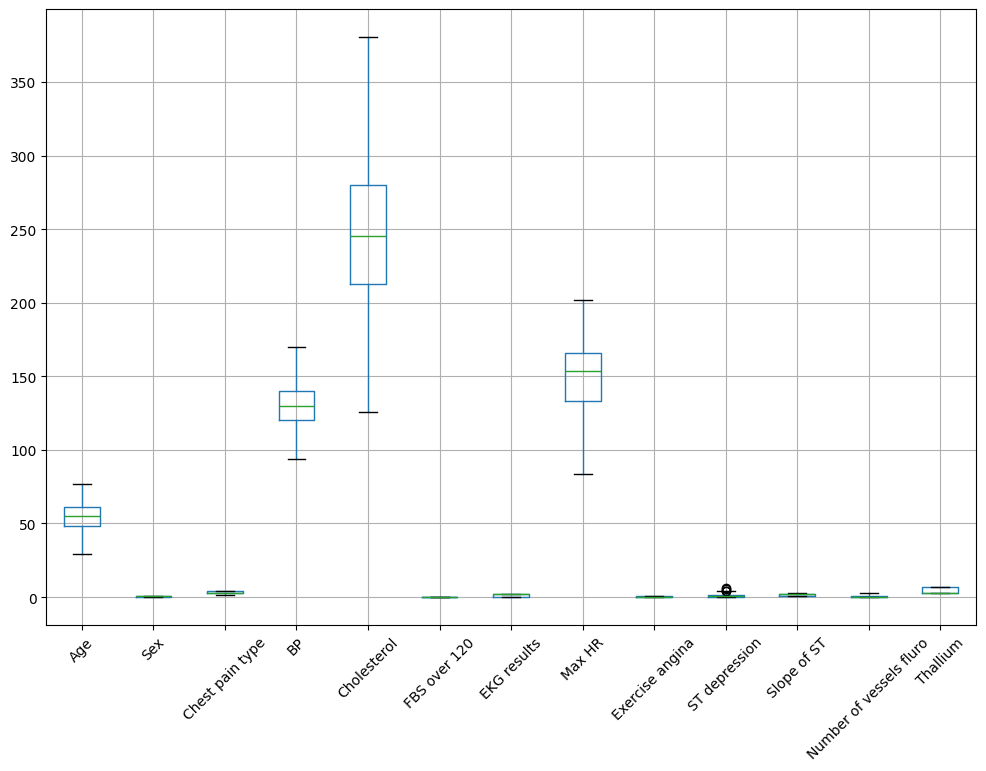

In [ ]:
df.boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [ ]:
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df[col][outlier_mask]
    return outliers

int_cols = df.select_dtypes(include='int').columns.tolist()
outliers = detect_outliers_iqr(df, int_cols)

# Example to print outliers for each column
cols_with_outliers = [col for col, vals in outliers.items() if not vals.empty]
print(cols_with_outliers)

[]


In [ ]:
def cap_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower, upper)
    return df

df_capped = cap_outliers_iqr(df, cols_with_outliers)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,f1_score
from sklearn.preprocessing import StandardScaler

In [38]:
model=LogisticRegression(max_iter=1000,random_state=42)
X=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,Y_train)
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(Y_test,y_pred)
print(classification_report(Y_test,y_pred))
print("Accuracy:",accuracy)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.85      0.81      0.83        21

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54

Accuracy: 0.8703703703703703


# Apply Random Forest

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,f1_score
from sklearn.preprocessing import StandardScaler

In [43]:
model=RandomForestClassifier(n_estimators=200,class_weight='balanced',random_state=42)
X=df.drop('Heart Disease',axis=1)
y=df['Heart Disease']
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
model.fit(X_train_scaled,Y_train)
y_pred=model.predict(X_test_scaled)
accuracy=accuracy_score(Y_test,y_pred)
print("classification_report",classification_report(Y_test,y_pred))
print("precision",precision_score(Y_test,y_pred))
print("f1_score",f1_score(Y_test,y_pred))
print("Accuracy:",accuracy)

classification_report               precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.94      0.71      0.81        21

    accuracy                           0.87        54
   macro avg       0.89      0.84      0.86        54
weighted avg       0.88      0.87      0.87        54

precision 0.9375
f1_score 0.8108108108108109
Accuracy: 0.8703703703703703


# Apply XgBoost

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score


In [47]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',   # change to 'recall' if recall is priority
    cv=5,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print("Precision:", precision_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54

[[26  4]
 [ 4 20]]
Precision: 0.8333333333333334
F1 Score: 0.8333333333333334
Accuracy: 0.8518518518518519


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:23:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Pipeline Processor

In [54]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [49]:
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ]),

    'Random Forest': Pipeline([
        ('model', RandomForestClassifier(random_state=42))
    ]),

    'XGBoost': Pipeline([
        ('model', xgb.XGBClassifier(
            eval_metric='logloss',
            use_label_encoder=False,
            random_state=42
        ))
    ])
}


In [51]:
param_grids = {
    'Logistic Regression': {
        'model__C': [0.01, 0.1, 1, 10]
    },

    'Random Forest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 5, 10]
    },

    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [3, 5],
        'model__learning_rate': [0.01, 0.1]
    }
}


In [55]:
results = {}

for name in pipelines:
    print(f"\nTraining {name}...")

    grid = GridSearchCV(
        pipelines[name],
        param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    results[name] = {
        'Best Params': grid.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }



Training Logistic Regression...

Training Random Forest...

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:27:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [56]:
for model, res in results.items():
    print("\n" + "="*50)
    print(f"Model: {model}")
    print("Accuracy :", res['Accuracy'])
    print("Precision:", res['Precision'])
    print("Recall   :", res['Recall'])
    print("Best Params:", res['Best Params'])
    print("\nConfusion Matrix:")
    print(res['Confusion Matrix'])
    print("\nClassification Report:")
    print(res['Classification Report'])



Model: Logistic Regression
Accuracy : 0.8518518518518519
Precision: 0.8076923076923077
Recall   : 0.875
Best Params: {'model__C': 0.01}

Confusion Matrix:
[[25  5]
 [ 3 21]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        30
           1       0.81      0.88      0.84        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54


Model: Random Forest
Accuracy : 0.8518518518518519
Precision: 0.8333333333333334
Recall   : 0.8333333333333334
Best Params: {'model__max_depth': 10, 'model__n_estimators': 200}

Confusion Matrix:
[[26  4]
 [ 4 20]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg    